<a href="https://colab.research.google.com/github/hquint/Quant/blob/master/SP_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Relaçao entre S&P500 e Ibovespa durante as ultimas 7 eleiçoes nos EUA

In [ ]:
# Importando as bibliotecas e instalando o yahoo finance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override();

In [ ]:
# Definindo o ano para analise: Começa em 1996 (1996, 2000, 2004, 2008, 2012, 2016, 2020)
# Unico parametro que precisa ser escolhido
ano = '2016';



[*********************100%***********************]  2 of 2 completed


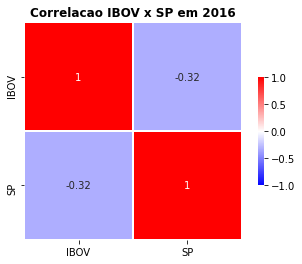

In [ ]:
# Pegando o exato dia da eleiçao no ano

if ano == '1996':
  dia = '05';
  dia2 = '10';
if ano == '2000':
  dia = '07';
  dia2 = '12';
elif ano == '2004':
  dia = '02';
  dia2 = '07';
elif ano == '2008':
  dia = '04';
  dia2 = '09';
elif ano == '2012':
  dia = '06';
  dia2 = '11';
elif ano == '2016':
  dia = '08';
  dia2 = '13';  
elif ano == '2020':
  dia = '03';
  dia2 = '08';

# Definindo os tickers (os indices para importar) e o periodo (entre o comeco de agosto, ie 3 meses antes das eleicoes ate o final do ano) 
# Lembrando que as eleicoes americanas sao realizadas sempre na terca feira apos a primeira segunda feira do mes de novembro. Ou seja, pode ser no mais cedo dia 2 de Novembro ou no mais tarde 8 de Novembro. 

tickers=['^BVSP','^GSPC']
dados = web.get_data_yahoo(tickers, start=ano+'-08-01', end=ano+'-12-31')['Close']

# Ajeitadno o nome das columas (Nao necessario)
dados.columns=['IBOV','SP'];

# Como o banco de dados normalmente apresenta dados faltantes (missing data), existem diferentes formas de como lidar com essa situacao. 
# Nesse caso, vamos interpolar para obter esses valores faltantes, sem perda de generalidade. 
dados=dados.interpolate(method='polynomial', order=2);

# Plotando os dados da IBOV e do SP500 no mesmo grafico junto com o dia da eleição
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace( 
    go.Scatter(name='IBOV',x=dados.index, y=dados.IBOV, 
               mode="lines+markers", marker=dict(size=5, color="Darkgreen")),
    secondary_y=False,
              )

fig.add_scatter(name='S&P500', x=dados.index, y=dados.SP,
                mode="lines+markers", marker=dict(size=5, color="Mediumblue"),
    secondary_y=True,
               )

# Create scatter trace of text labels
fig.add_trace(go.Scatter(
    x=[ano+"-11-"+dia2],
    y=[dados["IBOV"].max()],
    text=["<b>Dia da Eleição</b>"],
    mode="text",
    showlegend=False
))


# Add shapes
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            xref="x",
            yref="paper",
            x0=ano+"-11-"+dia,
            y0=0,
            x1=ano+"-11-"+dia,
            y1=1,
            line=dict(
                color="Red",
                width=3,
                dash="dot"
            )
))


fig.update_layout(
   title_text="<b>IBOV e S&P500 durante as eleição para Presidente dos EUA </b>", title_x=0.5
   )

fig.update_xaxes(title_text="<b>Dia</b>")
fig.update_yaxes(title_text="<b>IBOVESPA</b> ", secondary_y=False)
fig.update_yaxes(title_text="<b>S&P500</b> ", secondary_y=True)
fig.update_layout(legend=dict(x=0.01, y=0.95))


fig.show()

#Plotando a correlacao
ax = plt.axes()
sns.heatmap(dados.corr(), annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlacao IBOV x SP em "+ano, weight='bold')
plt.show()
